1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
###
#THE KDE is a non parametric way to estimate the probability density function of a random vairable
# It's used to visualize the distribution of a set of data points. 
# WE have to choose  a kerner function (smooth, symmetric and non negative) (usually --> gaussian)
#We center a kernel at each data point in the dataset, then we sum up the contributions of all the kernels
# to create a smooth estimate of the underling probability density function.

C:\Users\eugen\AppData\Local\Temp\ipykernel_8364\2391099331.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax1.errorbar(bin_centers, counts,yerr=errors, fmt='.k', color='black', ecolor='black', alpha= 0.7)


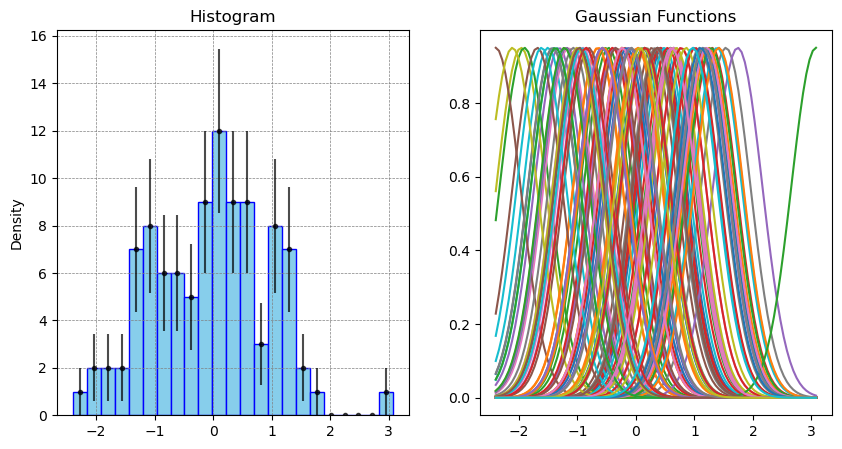

In [2]:
### fatto meglio ?
import matplotlib.pyplot as plt
import numpy as np 
import scipy
from scipy.integrate import trapz
#-------------ax1
N= 100
x= np.random.normal(0,1,N)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5)) # mi fa due subplot in 1 riga e due colonne 
bins= np.linspace(min(x), max(x), 24)
counts, edges, _= ax1.hist(x, bins, color='skyblue', edgecolor='blue', alpha=1)
errors= np.sqrt(counts)
bin_centers= 0.5 * (edges[:-1] + edges[1:])
ax1.errorbar(bin_centers, counts,yerr=errors, fmt='.k', color='black', ecolor='black', alpha= 0.7)
ax1.set_title('Histogram')
ax1.grid(True, color='grey', linestyle='dashed', linewidth=0.5)
ax1.set_ylabel('Density')
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer= True))

#----------ax2
x_values= np.linspace(min(x), max(x), 100)
gaussian_sum= np.zeros_like(x_values)
default_std= 1.06 * x.std() * x.size **(-1/5)

for value in x:
    gaussian=scipy.stats.norm.pdf(x_values, loc= value, scale= default_std)
    ax2.plot(x_values, gaussian)
    gaussian_sum += gaussian

ax2.set_title('Gaussian Functions')

plt.show()


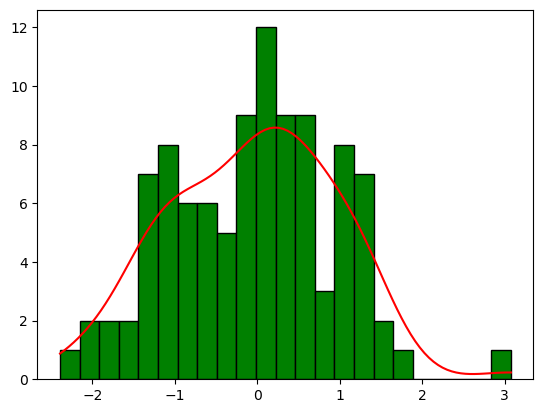

In [3]:
gaussian_area= np.trapz(gaussian_sum, x_values)  # y-> array to integrate, x->
dx= (max(x)-min(x))/(len(bins)-1)
hist_area= 0
for i in counts:
    dy= i*dx
    hist_area += dy
gaussian_sum_normalized= gaussian_sum * hist_area/ gaussian_area
fig, ax= plt.subplots()
ax.plot(x_values, gaussian_sum_normalized, color= 'red')
ax.hist(x, bins, color='green', edgecolor= 'black')
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

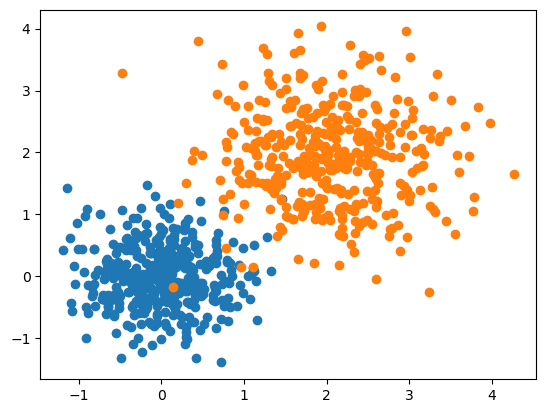

In [37]:
def f(loc1, loc2, mean1, mean2, N):
    x= np.random.normal(loc1, mean1,size= (N,2))
    y= np.random.normal(loc2, mean2, size= (N,2))
    plt.scatter(x[:,0], x[:,1])
    plt.scatter(y[:,0], y[:,1])
f(0,2,0.5, 0.7, 400)

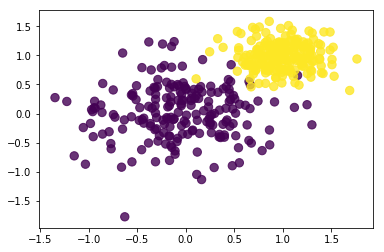

In [4]:

from IPython.display import Image
Image('two_categories_scatter_plot.png')

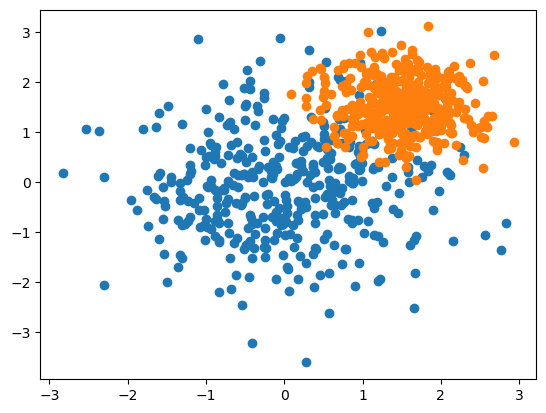

In [5]:
n = 2   # dimesionality of the data points
N = 400  # number of data points generated for each set
x = np.random.normal(loc=0.0, scale=1, size=(N,2))  # creazione di un set di random data points with normal distribution. Loc set the mean of distribution at 0.0, 'scale' set the standard deviation at 1.0, 'N', shape of array
y = np.random.normal(loc=1.5, scale=0.5, size=(N,2))
#no need to choose the colors for plotting on top of each other because python itself can differentiate
#for i in range(n):
plt.scatter(x[:,0],x[:,1],marker='o')  # satter prlot con prima e seconda variabile
plt.scatter(y[:,0],y[:,1],marker='o')

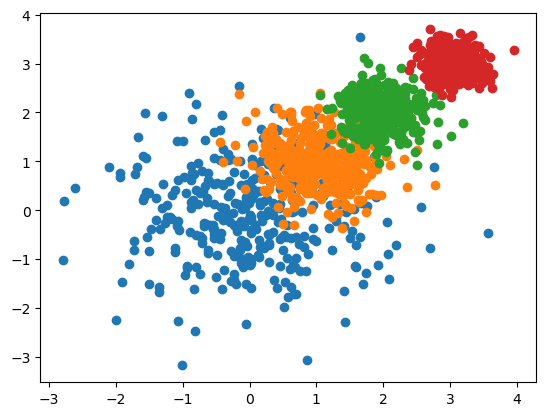

In [6]:
#Generalizing it to n categories
def Gaussian2d(n,N):#scale or std=0.5 for all and mean in steps of 1
    for i in range(n):#n is number of categories
        x=np.random.normal(loc=1*i, scale=1/(i+1), size=(N,2))#just changing the values of mean and std dev
        plt.scatter(x[:,0],x[:,1])
Gaussian2d(4,350)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [7]:
import pandas as pd 
import numpy as np
import scipy 
import seaborn as sns

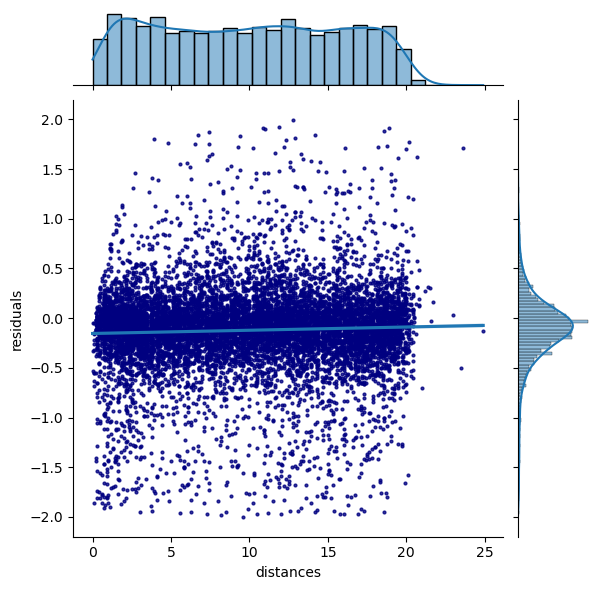

In [8]:
## (g)
import pandas as pd
import scipy 
import seaborn as sns
file= np.load("residuals_261.npy", allow_pickle=True).item()
df=pd.DataFrame(file)
df= df[abs(df['residuals'])<2]

slope, intercept,_, _, _ = scipy.stats.linregress(df['distances'], df['residuals'])
sns.jointplot(data=df, x='distances', y='residuals', kind= 'reg', scatter_kws={'color':'navy','s': 4})


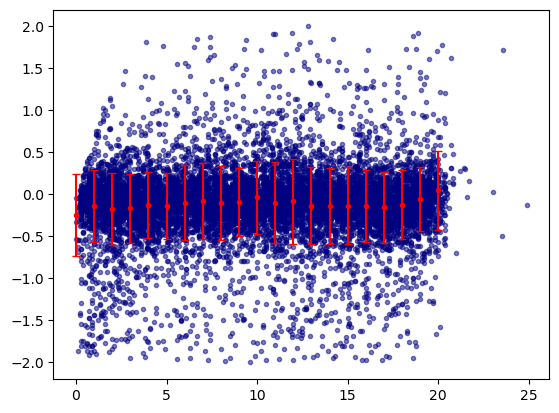

In [9]:
#fill 3 numpy arrays... ecc.
x = np.linspace(0, 20, 21)
y = np.zeros_like(x)
erry = np.zeros_like(x)

for i in x:
    y[int(i)] = np.mean(df[(df['distances']>=i) & ( df['distances']< i+1)]['residuals'])
    erry[int(i)] = np.std(df[(df['distances']>=i) & ( df['distances']< i+1)]['residuals'])

plt.errorbar(x, y, erry, color='r', capsize=3, fmt='.')
plt.scatter(df['distances'], df['residuals'], marker='.', alpha=0.5, color='navy')
plt.show()

